In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
import random

In [2]:

import numpy as np

import tensorflow as tf

train_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory='./curated_data',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(224, 224),
    seed=123,
    shuffle=True,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)
test_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory='./curated_data',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(224, 224),
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
)

Found 17104 files belonging to 3 classes.
Using 13684 files for training.
Found 17104 files belonging to 3 classes.
Using 3420 files for validation.


In [5]:
inputs = tf.keras.layers.Input(shape=(1,))
predictions = tf.keras.layers.Dense(1)(inputs)
model = tf.keras.applications.VGG16(weights=None,input_shape=(224,224,1),classes=3)
adam = optimizers.Adam(learning_rate = 0.003)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [6]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 1)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
initial_epochs = 10
history = model.fit(
  train_dataset,
  epochs=initial_epochs
)

Epoch 1/10
428/428 [==============================] - 189s 413ms/step - loss: 1932926.5894 - accuracy: 0.5860
Epoch 2/10
428/428 [==============================] - 167s 389ms/step - loss: 0.7992 - accuracy: 0.6684
Epoch 3/10
428/428 [==============================] - 167s 389ms/step - loss: 59.2050 - accuracy: 0.4934
Epoch 4/10
428/428 [==============================] - 167s 389ms/step - loss: 1.0186 - accuracy: 0.4300
Epoch 5/10
428/428 [==============================] - 167s 388ms/step - loss: 1.0192 - accuracy: 0.4340
Epoch 6/10
428/428 [==============================] - 162s 377ms/step - loss: 1.0193 - accuracy: 0.4379
Epoch 7/10
428/428 [==============================] - 167s 388ms/step - loss: 1.0182 - accuracy: 0.4395
Epoch 8/10
428/428 [==============================] - 166s 386ms/step - loss: 1.0185 - accuracy: 0.4359
Epoch 9/10
428/428 [==============================] - 166s 386ms/step - loss: 1.0187 - accuracy: 0.4347
Epoch 10/10
428/428 [==============================] - 16

In [8]:
results=model.evaluate(test_dataset)

107/107 [==============================] - 26s 234ms/step - loss: 1.0127 - accuracy: 0.4415


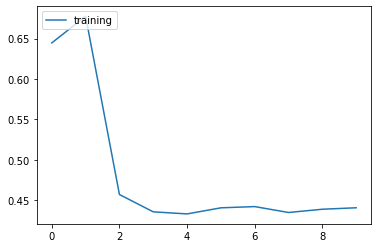

[343829.59375, 0.7831564545631409, 47.910274505615234, 1.0161285400390625, 1.016361117362976, 1.0160716772079468, 1.0158551931381226, 1.0162237882614136, 1.0160136222839355, 1.0156426429748535]
[0.6445483565330505, 0.6775065660476685, 0.45724934339523315, 0.4358374774456024, 0.43327975273132324, 0.4408067762851715, 0.4423414170742035, 0.4350336194038391, 0.43905290961265564, 0.44087985157966614]


In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.legend(['training'], loc = 'upper left')
plt.show()

# 각종 값 출력
print(history.history['loss'])
print(history.history['accuracy'])

In [10]:
results

[1.0127434730529785, 0.44152048230171204]